In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import torch
from sklearn.metrics import r2_score

import constant
from constant import org_cols, wsr_cols, geo_pow_cols, semigeo_cols
import myplot
from models import model_evaluation, model_improvement, get_days_error, NRMSE_all
path = "SL_SC_1/"
model_path = constant.model_path + path
plot_path = constant.plot_path + path
error_path = constant.error_path + path


In [2]:
%load_ext autoreload

# Evaluation

## load evaluation data, models, features

In [3]:
df_evl = pd.read_parquet(constant.SL_SC_EVL_path)
df_evl["TIME_CET"] = pd.to_datetime(df_evl["TIME_CET"])

In [4]:
model_original = torch.load(model_path + "original_model.pth")
model_wsr = torch.load(model_path + "wsr_model.pth")
model_geo = torch.load(model_path + "geo_model.pth")
model_semigeo = torch.load(model_path + "semigeo_model.pth")

In [5]:
original_errs= model_evaluation(df_evl, org_cols, model_original)
wsr_errs= model_evaluation(df_evl, wsr_cols, model_wsr)
geo_errs= model_evaluation(df_evl, geo_pow_cols, model_geo)
semigeo_errs= model_evaluation(df_evl, semigeo_cols, model_semigeo)

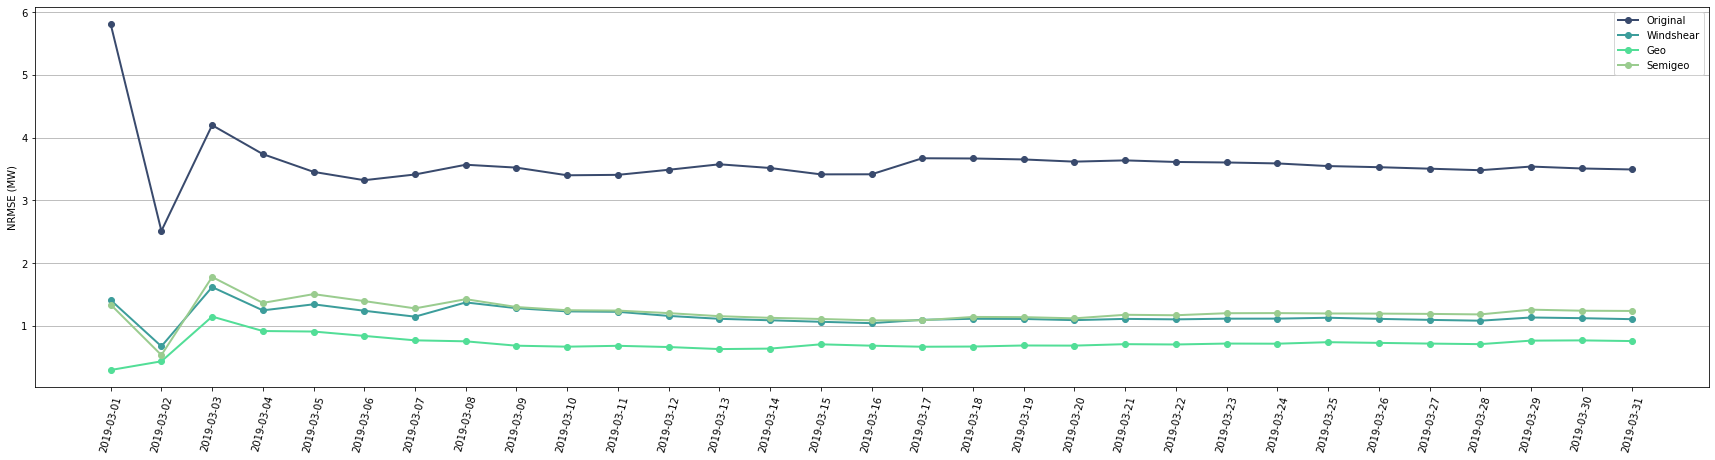

In [6]:
myplot.timelines(original_errs.index, 
{"Original":original_errs["NRMSE"], "Windshear":wsr_errs["NRMSE"], "Geo":geo_errs["NRMSE"], "Semigeo":semigeo_errs["NRMSE"]}, ylabel="NRMSE (MW)", fulltime=False)

### Error Distribution

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [19]:
def err_distribution(df):
    plt.figure(figsize=(10,7))
    df_groups = df.copy()
    df_groups = round(df_groups, 1)
    y = df_groups.groupby("NRMSE")["VAERDI"].count()
    x = np.linspace(0,len(y), len(y))
    plt.bar(x, y, width=0.5)
    plt.xticks(x, labels=y.index.tolist())

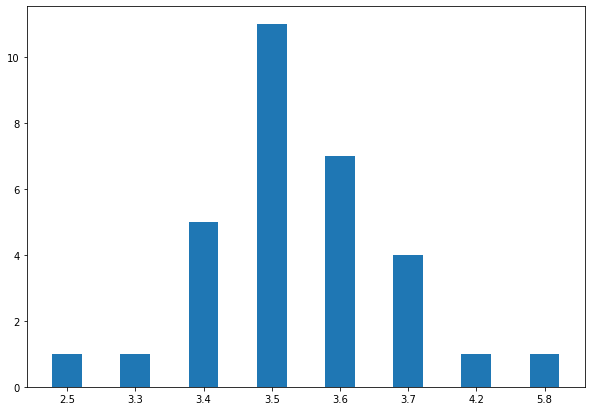

In [20]:
err_distribution(original_errs)

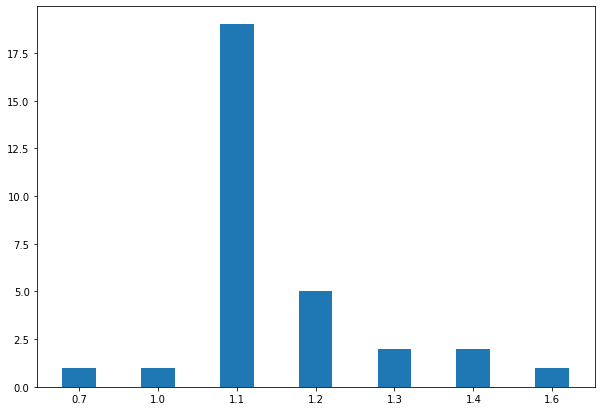

In [21]:
err_distribution(wsr_errs)

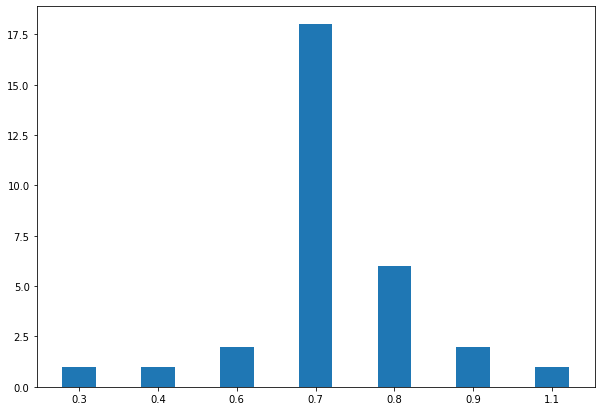

In [22]:
err_distribution(geo_errs)

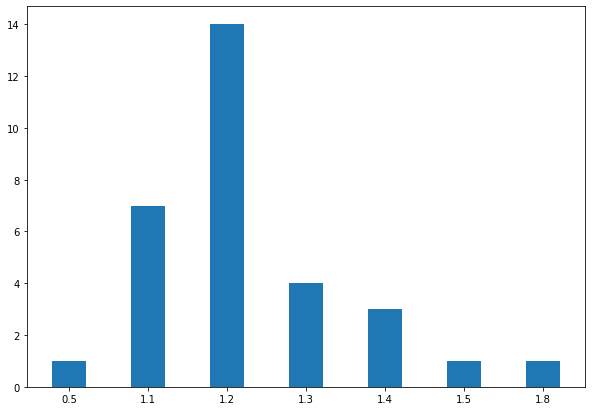

In [23]:
err_distribution(semigeo_errs)

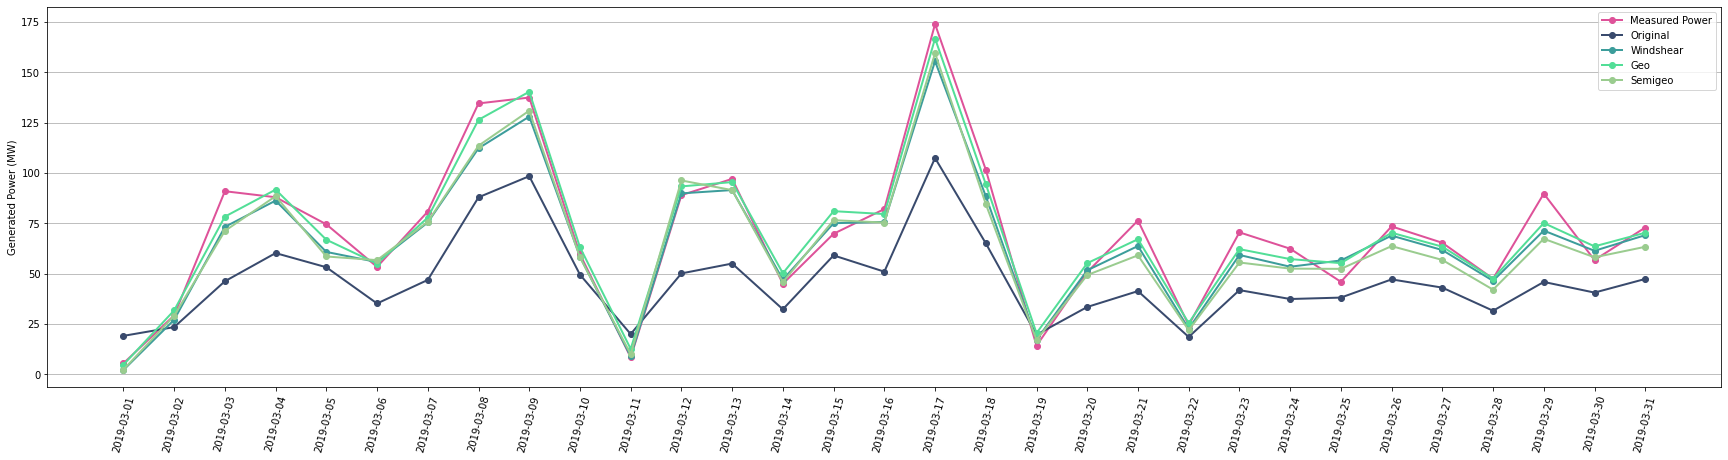

In [13]:
myplot.timelines(original_errs.index, 
{"Measured Power":original_errs["VAERDI"], "Original":original_errs["pred"], "Windshear":wsr_errs["pred"], "Geo":geo_errs["pred"], "Semigeo":semigeo_errs["pred"]}, ylabel="Generated Power (MW)", fulltime=False)

#### Model Comparement

In [14]:
imp_NRMSE, r2 = model_improvement({"Original": original_errs, "Windshear": wsr_errs, "Geo": geo_errs, "Semigeo": semigeo_errs}, "NRMSE")
r2

{'Original': 0.347, 'Windshear': 0.935, 'Geo': 0.969, 'Semigeo': 0.918}

In [15]:
original_NRMSE_all  = NRMSE_all(original_errs)
wsr_NRMSE_all = NRMSE_all(wsr_errs)
geo_NRMSE_all = NRMSE_all(geo_errs)
semigeo_NRMSE_all = NRMSE_all(semigeo_errs)

In [16]:
print(original_NRMSE_all)
print(wsr_NRMSE_all)
print(geo_NRMSE_all)
print(semigeo_NRMSE_all)

15.550778708168103
3.353031868558408
0.6089560197126995
4.03143400114176


In [17]:
print(original_errs["NRMSE"].std())
print(wsr_errs["NRMSE"].std())
print(geo_errs["NRMSE"].std())
print(semigeo_errs["NRMSE"].std())

0.4768097828483075
0.15259467615147343
0.1385572385238889
0.18954502093851866


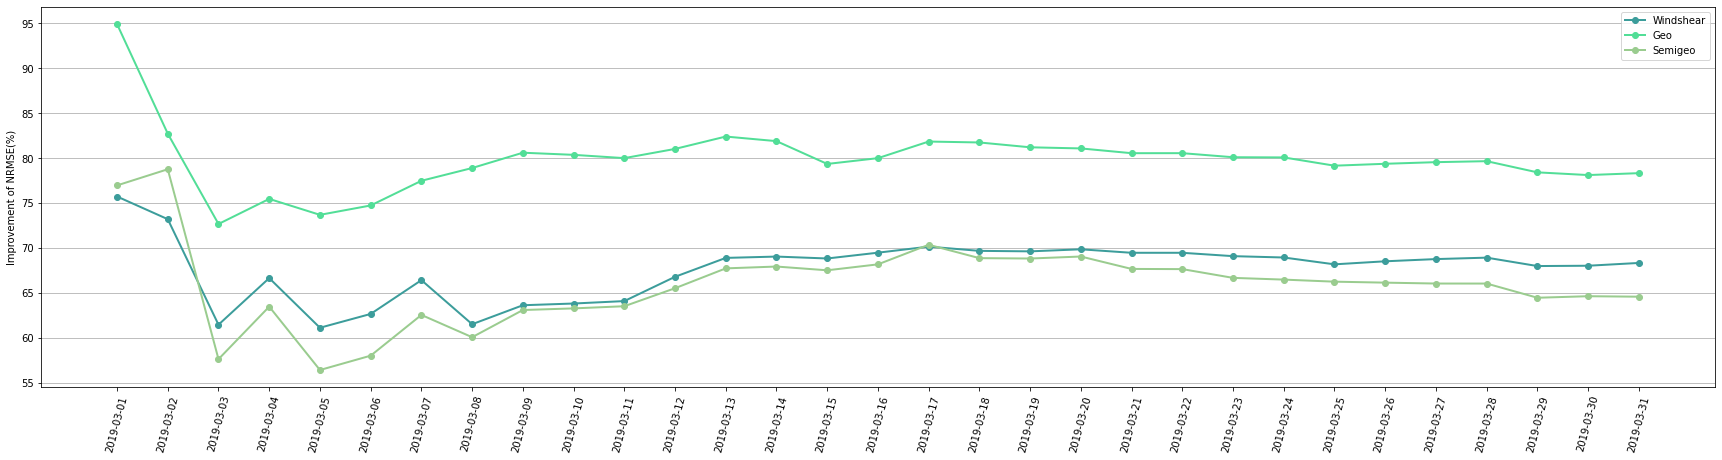

In [18]:
myplot.timelines(original_errs.index, 
{"Windshear":imp_NRMSE["Windshear"]["Original"], "Geo":imp_NRMSE["Geo"]["Original"], "Semigeo":imp_NRMSE["Semigeo"]["Original"]}, ylabel="Improvement of NRMSE(%)", fulltime=False)